In [3]:
# Author: Brent Artuch
# Date: 2024-11-17

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

## Eigenvalues and Eigenvectors
We have an $\mathbf{eigenvector}$ when applying a unitary guantum gate results in the same vector mutliplied by some scalar called an $\mathbf{eigenvalue}$. For example, let the gate be $X$ and $\ket{+}$ the vector, when we apply $X$  to $\ket{+}$, we get:
\begin{align*}
X\ket{+}=
\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1/\sqrt{2} \\
1/\sqrt{2} \\
\end{pmatrix}
=
\begin{pmatrix}
1/\sqrt{2} \\
1/\sqrt{2} \\
\end{pmatrix}=(1)\ket{+}
\end{align*}
so $\ket{+}$ is an eigenvector with eigenvalue $1$.

Similarly, if we apply $X$ to $\ket{-}$, we have:
\begin{align*}
X\ket{-}=
\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}
\begin{pmatrix}
1/\sqrt{2} \\
-1/\sqrt{2} \\
\end{pmatrix}=
\begin{pmatrix}
-1/\sqrt{2} \\
1/\sqrt{2} \\
\end{pmatrix}=(-1)
\begin{pmatrix}
1/\sqrt{2} \\
-1/\sqrt{2} \\
\end{pmatrix}=(-1)\ket{-}
\end{align*}
so $\ket{-}$ is an eigenvector with eigenvalue $-1$.

The general equation for eigenvectors and eigenvalues in Dirac notation is:
\begin{align*}
A\ket{u}=\lambda\ket{u}
\end{align*}
where $A$ is a square matrix, $\lambda$ (the eigenvalue) is a scalar, and $\ket{u}$ (the eigenvector) is a vector.

The set of all eigenvectors of $A$ corresponding to the same eigenvalue $\lambda$ is called the $\mathbf{eigenspace}$. 

A $\mathbf{diagonal\ representation}$ for the operator $A$ on a vector space:
\begin{align*}
A=\sum_{i}\lambda_i\ket{i}\bra{i}
\end{align*}
where vectors $\ket{i}$ form an orthonormal set of eignevectors for $A$ with corresponding eigenvalues $\lambda_i$.  

An example using the pauli matrix $Z$:
\begin{align*}
Z=
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}=
1\ket{0}\bra{0}-1\ket{1}\bra{1}=
1\begin{pmatrix}
1 & 0 \\
0 & 0 \\
\end{pmatrix}-
1\begin{pmatrix}
0 & 0 \\
0 & 1 \\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 \\
0 & 0 \\
\end{pmatrix}+
\begin{pmatrix}
0 & 0 \\
0 & -1 \\
\end{pmatrix}
\end{align*}

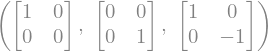

In [2]:
# With Python
ket_0 = np.array([[1],[0]])
ket_1 = np.array([[0],[1]])

sp.Matrix(np.outer(ket_0,ket_0)), sp.Matrix(np.outer(ket_1,ket_1)), sp.Matrix((1)*np.outer(ket_0,ket_0)+(-1)*np.outer(ket_1,ket_1))

## The Phase Estimation Problem
We are given a quantum state $\ket{\psi}$ of $n$ qubits, along with a unitary quantum circuit that acts on $n$ qubits. It is assumed that $\ket{\psi}$ is an eigenvector of the unitary matrix $U$ that corrseponds with the circuit, and the goal is to find the eigenvalue $\lambda$ that goes with the the eigenvector $\ket{\psi}$. Because $\lambda$ lies somewhere on the complex unit circle, we have:
\begin{align*}
\lambda=e^{2\pi i\theta}
\end{align*}
where $\theta$ is a real number ST $0\le\theta<1$.

So the ultimate goal of this problem is to find $\theta$.

## The Phase Estimation Procedure
The general procedure for phase estimation is illustrated by the following diagram:
<div align="center">
    <img src="Diagrams/PhaseEstimation.png" alt="Description" width="800" height="800">
    <div class="caption">(Credit: IBM Quantum Learning)</div>
</div><br>

Let's first break down the elements of this quantum circuit:
* We have $m$ qubits in the ground state.
* Each of those $m$ qubits are placed into the superposition state $\ket{+}$.
* There is a set qubits whose state is the eigenstate $\ket{\psi}$.
* The controlled unitary operation $U$ is applied where every $\ket{+}$ is a control and every state with eigenstate $\ket{\psi}$ is the target.
* The inverse Quantum Fourier Transform is applied to all of the $\ket{+}$ states and those states are measured.

Using thte general equation for eigenvectors and eigenvalues that we defined earlier, we have an equation with the form:
\begin{align*}
U\ket{\psi}=e^{i\theta}\ket{\psi}
\end{align*}
where $U$ is our unitary operation, $\ket{\psi}$ is the $n$ qubit eigenstates (vectors) of $U$, and its eigenvalue takes the form $e^{i\theta}$.

Let's step through the process of the circuit atarting with the base state. We have:
\begin{align*}
\ket{0\dots00}\ket{\psi}
\end{align*}

After applying $H^{\otimes m}$ gates, we get:
\begin{align*}
\ket{+\dots ++}\ket{\psi}
\end{align*}

Now let's expand the first qubit set:
\begin{align*}
\frac{1}{\sqrt{2^m}}(\ket{0}+\ket{1})\dots(\ket{0}+\ket{1})(\ket{0}+\ket{1})\ket{\psi}
\end{align*}

Next we apply the controlled $U$ gates as shown in the diagram:
\begin{align*}
\frac{1}{\sqrt{2^m}}(\ket{0}+e^{2^{m-1}i\theta}\ket{1})\dots(\ket{0}+e^{2i\theta}\ket{1})(\ket{0}+e^{i\theta}\ket{1})\ket{\psi}
\end{align*}

For simplicity, we will set $\theta=2\pi j$, and plug it into the equation. Once we find $j$ we can simply multiply by $2\pi$ to find $\theta$. So now we have:
\begin{align*}
\frac{1}{\sqrt{2^m}}(\ket{0}+e^{2^{m-1}i2\pi j}\ket{1})\dots(\ket{0}+e^{2i2\pi j}\ket{1})(\ket{0}+e^{i2\pi j}\ket{1})\ket{\psi}
\end{align*}

Recall that:
\begin{align*}
j=0.j_1j_2\dots j_m
\end{align*}
and 
\begin{align*}
2^mj=j_1j_2\dots j_{m-1}.j_m
\end{align*}
Note: we are only interested in the part of $j$ where $0\le j<1$.

With that in mind, the equation takes the form:
\begin{align*}
\frac{1}{\sqrt{2^m}}(\ket{0}+e^{2\pi i (0.j_m)}\ket{1})\dots(\ket{0}+e^{2\pi i (0.j_2\dots j_m)}\ket{1})(\ket{0}+e^{2\pi i (0.j_1\dots j_m)}\ket{1})\ket{\psi}
\end{align*}

This is the result of the Quantum Foruier Transformation of $\ket{j_1j_2\dots j_m}$, so we can use the Inverse Quatum Fourier Transformation to solve for $\ket{j_1j_2\dots j_m}$:
\begin{align*}
\ket{j_1j_2\dots j_m}\ket{\psi}
\end{align*}

Once we measure $\ket{j_1j_2\dots j_m}$, we have:
\begin{align*}
j_1,j_2,\dots,j_m
\end{align*}
where 
\begin{align*}
j=0.j_1j_2\dots j_m=\frac{j_1}{2}+\frac{j_2}{4}+\dots+\frac{j_m}{2^m}
\end{align*}

Finally, we have the eigenvalue:
\begin{align*}
e^{i\theta}=e^{2\pi ij}
\end{align*}
Note: this will approximate the eigenvalue up to $m$ bits of precision.